# Installs

In [1]:
# Basic stuff
import numpy as np
import pandas as pd
# importing libraries for data visualisations
from matplotlib import pyplot
import matplotlib.pyplot as plt
# Feature engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
#Evaluation and saving models
import joblib
# Importing Required Libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#Data Management and cleaning





### This part of the code is something that's basically been copied over from an old assignment for the HR Attrition dataset.
Before loading the .csv files into the database, we might as well handle the basic cleaning steps beforehand

In [2]:
#importing data into variables
employee_survey = pd.read_csv('https://raw.githubusercontent.com/CNielsen94/NN_exercises_AAUBSDS/main/Assignment%201%20-%20Simple%20NN/employee_survey_data.csv')
df_general = pd.read_csv('https://raw.githubusercontent.com/CNielsen94/NN_exercises_AAUBSDS/main/Assignment%201%20-%20Simple%20NN/general_data.csv')
manager_survey = pd.read_csv('https://raw.githubusercontent.com/CNielsen94/NN_exercises_AAUBSDS/main/Assignment%201%20-%20Simple%20NN/manager_survey_data.csv')

Taking a quick look at the data structure and information

In [3]:
employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


Looks like the employee_survey contains a few NaNs

In [4]:
manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


The manager_survey however looks clean

In [5]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In the general data, it looks a few of the columns have rows with missing values in them. These need to be cleaned up

We have decided in this case to use simple imputation with the mean value  into the missing values of the employee_survey dataframe, as it is a relatively few amount of values that have gone missing.

In [6]:
#Cleaning up some missing values by imputing the mean into employee_survey
employee_survey = employee_survey.fillna(employee_survey.mean())

manager_survey['total_mn'] = (manager_survey['JobInvolvement']+manager_survey['PerformanceRating'])/2
employee_survey['total_em'] = (employee_survey['EnvironmentSatisfaction']+employee_survey['JobSatisfaction']+employee_survey['WorkLifeBalance'])/3
general_df = df_general.dropna(axis=0) # Making it a variable here just in case something breaks before this point (You never know)

In [7]:
#Let's make sure we don't have misaligned dataframes before loading it up

# create a list of all EmployeeIDs that exist in the other dataframe
existing_ids = list(general_df['EmployeeID'].unique())

# drop all rows with EmployeeID not in existing_ids from manager_survey
manager_survey = manager_survey[manager_survey['EmployeeID'].isin(existing_ids)]

# drop all rows with EmployeeID not in existing_ids from employee_survey
employee_survey = employee_survey[employee_survey['EmployeeID'].isin(existing_ids)]

After this point the code simply merges all the dataframes into a single one, which we used in the original assignment, but now that the data is clean, we'll load it into a database instead for further use.

## Old code using csv

In [8]:
# Merging dataframe manager_survey to df_general based on 'EmployeeID'
#df_general = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
#df_EDA = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
# Merging dataframe employee_survey to df_general based on 'EmployeeID'
#df_general = df_general.merge(employee_survey[['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance','total_em']], on='EmployeeID')
#df_EDA = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
# Dropping rows containing NaN-values
#df_EDA.dropna(axis=0,inplace=True)
#df_general.dropna(axis=0,inplace=True)
#df_general.info()

In [9]:
#df_EDA.info()

In [10]:
#df_EDA['MaritalStatus']

We also drop some "useless" features from the dataset, as for example the "EmployeeCount" simply goes from 1-4410 along with the indexes, "Over18" only contains values for "Yes" as all employees are above 18. Finally the "StandardHours" only contain the value "8". Therefore these columns have no variance and don't tell us anything.

In [11]:
#df_general.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeID'], axis = 1, inplace = True)
#df_general.head()

In [12]:
#df_general['MaritalStatus']

In [13]:
#df_general.columns

In [14]:
#df_EDA['MaritalStatus']

## DB stuff starts here

In [15]:
import sqlite3

In [16]:
conn = sqlite3.connect('HR_DB.db')
general_df['Attrition_Class'] = ''

<ipython-input-16-8919ec8d48d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_df['Attrition_Class'] = ''


In [17]:
general_df.to_sql('general', conn, if_exists='append', index=False)

4382

In [18]:
employee_survey.to_sql('employee_survey', conn, if_exists='append',index=False)

4382

In [19]:
manager_survey.to_sql('manager_survey', conn, if_exists='append',index=False)

4382

Now we recode some of the columns into bins or tiers. We can read in our dataframes from the DB again, adapt them using some fancy math, and then update the data in the DB.

In [20]:
query = 'SELECT EmployeeID, Age, DistanceFromHome, YearsAtCompany, TotalWorkingYears, MonthlyIncome FROM general'
df_tiers = pd.read_sql(query, conn)

In [21]:
df_tiers.head(5)

,EmployeeID,Age,DistanceFromHome,YearsAtCompany,TotalWorkingYears,MonthlyIncome
0,1,51,6,1,1.0,131160
1,2,31,10,5,6.0,41890
2,3,32,17,5,5.0,193280
3,4,38,2,8,13.0,83210
4,5,32,10,6,9.0,23420


In [22]:
# create a list of our conditions
conditions = [
    (df_tiers['Age'] <= 20),
    (df_tiers['Age'] > 20) & (df_tiers['Age'] <= 30),
    (df_tiers['Age'] > 30) & (df_tiers['Age'] <= 40),
    (df_tiers['Age'] > 40) & (df_tiers['Age'] <= 50),
    (df_tiers['Age'] > 50) & (df_tiers['Age'] <= 60)
    ]

# create a list of the values we want to assign for each condition
values = ['less_20', '20_30', '30_40', '40_50', '50_60']

# create a new column and use np.select to assign values to it using our lists as arguments
df_tiers['Age_tier'] = np.select(conditions, values)

In [23]:
# create a list of our conditions
conditions = [
    (df_tiers['DistanceFromHome'] > 0) & (df_tiers['DistanceFromHome'] <= 5),
    (df_tiers['DistanceFromHome'] > 5) & (df_tiers['DistanceFromHome'] <= 10),
    (df_tiers['DistanceFromHome'] > 10) & (df_tiers['DistanceFromHome'] <= 20),
    (df_tiers['DistanceFromHome'] > 20) & (df_tiers['DistanceFromHome'] <= 29)
    ]

# create a list of the values we want to assign for each condition
values = [4,3,2,1]

# create a new column and use np.select to assign values to it using our lists as arguments
df_tiers['distancehome_tier'] = np.select(conditions, values)

In [24]:
df_general['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [25]:
# create a list of our conditions
conditions = [
    (df_tiers['YearsAtCompany'] >= 0) & (df_tiers['YearsAtCompany'] <2),
    (df_tiers['YearsAtCompany'] >= 2) & (df_tiers['YearsAtCompany'] <5),
    (df_tiers['YearsAtCompany'] >= 5) & (df_tiers['YearsAtCompany'] <8),
    (df_tiers['YearsAtCompany'] >= 8) & (df_tiers['YearsAtCompany'] <12),
    (df_tiers['YearsAtCompany'] >=12)
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5]

# create a new column and use np.select to assign values to it using our lists as arguments
df_tiers['YearsAtCompany_tier'] = np.select(conditions, values)

In [26]:
# create a list of our conditions
conditions = [
    (df_tiers['TotalWorkingYears'] >= 0) & (df_tiers['TotalWorkingYears'] <2),
    (df_tiers['TotalWorkingYears'] >= 2) & (df_tiers['TotalWorkingYears'] <5),
    (df_tiers['TotalWorkingYears'] >= 5) & (df_tiers['TotalWorkingYears'] <8),
    (df_tiers['TotalWorkingYears'] >= 8) & (df_tiers['TotalWorkingYears'] <12),
    (df_tiers['TotalWorkingYears'] >=12)
    ]
# create a list of the values we want to assign for each condition
values = [1,2,3,4,5]

# create a new column and use np.select to assign values to it using our lists as arguments
df_tiers['TotalWorkingYear_tier'] = np.select(conditions, values)

In [27]:
# create a list of our conditions
conditions = [
    (df_tiers['MonthlyIncome'] >= 10000) & (df_tiers['MonthlyIncome'] <25000),
    (df_tiers['MonthlyIncome'] >= 25000) & (df_tiers['MonthlyIncome'] <35000),
    (df_tiers['MonthlyIncome'] >= 35000) & (df_tiers['MonthlyIncome'] <60000),
    (df_tiers['MonthlyIncome'] >=60000) & (df_tiers['MonthlyIncome'] <100000),
    (df_tiers['MonthlyIncome'] >=100000)
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,4,5]

# create a new column and use np.select to assign values to it using our lists as arguments
df_tiers['MonthlyIncome_tier'] = np.select(conditions, values)

In [28]:
df_tiers.head(5)

,EmployeeID,Age,DistanceFromHome,YearsAtCompany,TotalWorkingYears,MonthlyIncome,Age_tier,distancehome_tier,YearsAtCompany_tier,TotalWorkingYear_tier,MonthlyIncome_tier
0,1,51,6,1,1.0,131160,50_60,3,1,1,5
1,2,31,10,5,6.0,41890,30_40,3,3,3,3
2,3,32,17,5,5.0,193280,30_40,2,3,3,5
3,4,38,2,8,13.0,83210,30_40,4,4,5,4
4,5,32,10,6,9.0,23420,30_40,3,3,4,1


Now we can create a new DF for the DB containing the corresponding variable tiers of the company employees. The general information dataframe is already large enough without adding an additional 5 that may not be needed anywhere else in a company. Keeping track of attrition is an ongoing process however, so keeping these tiers separately updated could be useful

In [29]:
new_df = df_tiers[['EmployeeID', 'Age_tier', 'distancehome_tier','YearsAtCompany_tier','TotalWorkingYear_tier','MonthlyIncome_tier']]

In [30]:
new_df.head(5)

,EmployeeID,Age_tier,distancehome_tier,YearsAtCompany_tier,TotalWorkingYear_tier,MonthlyIncome_tier
0,1,50_60,3,1,1,5
1,2,30_40,3,3,3,3
2,3,30_40,2,3,3,5
3,4,30_40,4,4,5,4
4,5,30_40,3,3,4,1


In [31]:
new_df.to_sql('EmployeeTiers', conn, if_exists='append',index=False)

4382

## Now we can start handling the data for some actual analysis

### First some queries to select all the data we need from DB

In [32]:
query = 'SELECT * FROM general'
df_general = pd.read_sql(query, conn)

In [33]:
df_general.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Class'],
      dtype='object')

In [34]:
query = 'SELECT * FROM EmployeeTiers'
employee_tiers = pd.read_sql(query, conn)

In [35]:
employee_tiers.columns

Index(['EmployeeID', 'Age_tier', 'distancehome_tier', 'YearsAtCompany_tier',
       'TotalWorkingYear_tier', 'MonthlyIncome_tier'],
      dtype='object')

In [36]:
query = 'SELECT * FROM employee_survey'
employee_survey = pd.read_sql(query, conn)

In [37]:
employee_survey.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'total_em'],
      dtype='object')

In [38]:
query = 'SELECT * FROM manager_survey'
manager_survey = pd.read_sql(query, conn)

In [39]:
manager_survey.columns

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating', 'total_mn'], dtype='object')

# Define Neural Network and Tensors

In [68]:
#First we load in the variables we want. For simplicity of the example, we'll do it based on the original assignments feature importances of all variables
sql_query = '''SELECT e.EmployeeID, e.TotalWorkingYear_tier, e.YearsAtCompany_tier, s.EnvironmentSatisfaction, g.Attrition
               FROM EmployeeTiers e
               JOIN employee_survey s ON e.EmployeeID = s.EmployeeID
               JOIN general g ON e.EmployeeID = g.EmployeeID'''
df = pd.read_sql_query(sql_query, conn)


In [69]:
df.head(5)

,EmployeeID,TotalWorkingYear_tier,YearsAtCompany_tier,EnvironmentSatisfaction,Attrition
0,1,1,1,3.0,No
1,2,3,3,3.0,Yes
2,3,3,3,2.0,No
3,4,5,4,4.0,No
4,5,4,3,4.0,No


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4382 entries, 0 to 4381
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4382 non-null   int64  
 1   TotalWorkingYear_tier    4382 non-null   int64  
 2   YearsAtCompany_tier      4382 non-null   int64  
 3   EnvironmentSatisfaction  4382 non-null   float64
 4   Attrition                4382 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 171.3+ KB


In [74]:
leAttrition = LabelEncoder()

In [77]:
df['Attrition_LE'] = leAttrition.fit_transform(df['Attrition'])

In [79]:
df.head(3)

,EmployeeID,TotalWorkingYear_tier,YearsAtCompany_tier,EnvironmentSatisfaction,Attrition,Attrition_LE
0,1,1,1,3.0,No,0
1,2,3,3,3.0,Yes,1
2,3,3,3,2.0,No,0


In [84]:
# create a MinMaxScaler object
MMS = MinMaxScaler()

# scale the dataframe, drop the 'Attrition' column, and convert the result to a dataframe
df_scaled = pd.DataFrame(MMS.fit_transform(df.drop('Attrition', axis=1)), columns=df.drop('Attrition', axis=1).columns)

In [85]:
df_scaled

,EmployeeID,TotalWorkingYear_tier,YearsAtCompany_tier,EnvironmentSatisfaction,Attrition_LE
0,0.000000,0.00,0.00,0.666667,0.0
1,0.000227,0.50,0.50,0.666667,1.0
2,0.000454,0.50,0.50,0.333333,0.0
3,0.000681,1.00,0.75,1.000000,0.0
4,0.000907,0.75,0.50,1.000000,0.0
...,...,...,...,...,...
4377,0.999093,0.50,0.50,0.666667,0.0
4378,0.999319,0.75,0.25,1.000000,0.0
4379,0.999546,0.75,0.25,1.000000,0.0
4380,0.999773,0.50,0.25,0.000000,0.0


![image.png](attachment:image.png)

In [86]:
#Define X_tensor and y_tensor
X_tensor = torch.tensor(df_scaled[['TotalWorkingYear_tier','EnvironmentSatisfaction','YearsAtCompany_tier']].values.astype(np.float32))
y_tensor = torch.tensor(df_scaled[['Attrition_LE']].values.astype(np.float32))

In [87]:
print(X_tensor.size())
print(y_tensor.size())

torch.Size([4382, 3])
torch.Size([4382, 1])


##Create a simple NN for the prediction task:

In [126]:
epochs1 = 10
learning_rate1 = 0.0008
loss_set1 = {}

We should use CrossEntropyLoss instead of MSE, but for some reason the model will not work, as it doesn't expect CrossEntropyLoss as argument 0, but instead wants a tensor. This is something to come back to later, as we get a better understanding of how the code works.

In [127]:
# Define the model
model_net1 = torch.nn.Sequential(torch.nn.Linear(3,2),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(2,1),
                                 torch.nn.Sigmoid())

# Define the loss function and optimizer
loss_mse1 = torch.nn.MSELoss()
optimizer1 = torch.optim.Adam(model_net1.parameters(), lr=0.01, weight_decay=0.001)

In [128]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # check if GPU is available

model_net1.to(device)  # move model to GPU
X_tensor = X_tensor.to(device)  # move data to GPU
y_tensor = y_tensor.to(device)

In [91]:
import tqdm

In [129]:
# Create an empty list to store the losses for each epoch
loss_set1 = []

# Train the model
for i in tqdm_notebook(range(epochs1), total=epochs1, unit="epoch"):
    lost_set_epoch = {}
    j = 0
    for x, y_t in zip(X_tensor, y_tensor):
        output = model_net1.forward(x.float())
        # FeedForward Evaluation
        loss = loss_mse1(output, y_t.float())
        optimizer1.zero_grad()

        # Backward / Gradient Calculation
        loss.backward()

        # Back Propagation
        optimizer1.step()

        # Display loss
        lost_set_epoch[j] = loss
        j = j + 1

    # Calculate average loss for the epoch
    epoch_loss = torch.mean(torch.stack(list(lost_set_epoch.values()))).cpu().detach().numpy()


    # Append epoch loss to the list
    loss_set1.append(epoch_loss)

    # Print the loss every 10 epochs
    if (i+1) % 1 == 0:
        print(f"Epoch {i+1}, Loss: {epoch_loss}")

    # Early stopping
    if i > 100 and epoch_loss > max(loss_set1[-100:]):
        print(f"Stopping early at epoch {i+1}")
        break

<ipython-input-129-7e2505c0638e>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs1), total=epochs1, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch 1, Loss: 0.12784600257873535
Epoch 2, Loss: 0.12593010067939758
Epoch 3, Loss: 0.12570728361606598
Epoch 4, Loss: 0.1256495714187622
Epoch 5, Loss: 0.12565462291240692
Epoch 6, Loss: 0.12563778460025787
Epoch 7, Loss: 0.12565305829048157
Epoch 8, Loss: 0.1256452351808548
Epoch 9, Loss: 0.12564314901828766
Epoch 10, Loss: 0.12565745413303375


In [130]:
torch.save(model_net1.state_dict(), 'model.pth')

# Stuff from DL assignment

In [ ]:
model_net1 = torch.nn.Sequential(torch.nn.Linear(3,2),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(2,1),
                                 torch.nn.Sigmoid());
loss_mse1 = torch.nn.MSELoss()
optimizer1 = torch.optim.SGD(model_net1.parameters(),lr=learning_rate1) # SGD algorithm for optimization 

for i in tqdm_notebook(range(epochs1), total=epochs1, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net1.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse1(output, y_t.float())
          optimizer1.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer1.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set1[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set1[i]}")

In [58]:
plt.plot(np.array(list(loss_set1.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

AttributeError: ignored

Not sure what is going on here. The results seems to change each time the notebook is being run. Sometimes it make slight improvements, and other times it does the exact opposite, and MSE increases along with the epochs.

##Second Variation

Next we will try to adjust some of the hyperparameters of the model, and  see if we can decrease MSE further. As the NN doesn't seem to adjust after the first epoch, we will initially keep this parameter at the current 10, and instead try to adjust the other parameters.

In [ ]:
epochs2 = 10 # Number of epochs remain 10 for now
learning_rate2 = 0.005 # We change the learning rate from 0.001 to 0.005 and see what happens
loss_set2 = {}

In [ ]:
model_net2 = torch.nn.Sequential(torch.nn.Linear(3,2),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(2,3), # We add a third layer inbetween the initital two. This layer will contain 2 neurons, and give 3 outputs for the final layer.
                                 torch.nn.Sigmoid(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Sigmoid());
loss_mse2 = torch.nn.MSELoss()
optimizer2 = torch.optim.RMSprop(model_net2.parameters(),lr=learning_rate2)

for i in tqdm_notebook(range(epochs2), total=epochs2, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net2.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse2(output, y_t.float())
          optimizer2.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer2.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set2[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set2[i]}")

<ipython-input-95-cf8d45ffe148>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs2), total=epochs2, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.13660264015197754
Loss: 0.13546624779701233
Loss: 0.1354607194662094
Loss: 0.13545508682727814
Loss: 0.1354493796825409
Loss: 0.13544362783432007
Loss: 0.13543781638145447
Loss: 0.13543196022510529
Loss: 0.1354260891675949
Loss: 0.13542018830776215


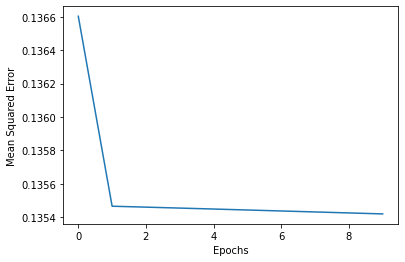

In [ ]:
plt.plot(np.array(list(loss_set2.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

##Third variation

In [ ]:
epochs3 = 10 # Number of epochs remain 10 for now
learning_rate3 = 0.003 # We change the learning rate from 0.001 to 0.003 and see what happens
loss_set3 = {}

In this variation, we replaced the Sigmoid function within the hidden layers to a new activation function; SiLU, which is a combination of the Sigmoid and ReLU activation functions. We stick with the 10 epochs, as the NN haven't had the need for more as of yet. We also tried changing the learning_rate to 0.003, which is right inbetween the learning_rate for the first and second variation

In [ ]:
model_net3 = torch.nn.Sequential(torch.nn.Linear(3,2),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(2,3), # We add a third layer inbetween the initital two. This layer will contain 2 neurons, and give 3 outputs for the final layer.
                                 torch.nn.SiLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Sigmoid());
loss_mse3 = torch.nn.MSELoss()
optimizer3 = torch.optim.RMSprop(model_net3.parameters(),lr=learning_rate3)

for i in tqdm_notebook(range(epochs3), total=epochs3, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net3.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse3(output, y_t.float())
          optimizer3.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer3.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set3[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set3[i]}")

<ipython-input-98-52f984bdf5f7>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs3), total=epochs3, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.12843050062656403
Loss: 0.12623564898967743
Loss: 0.12580257654190063
Loss: 0.12565277516841888
Loss: 0.1255493462085724
Loss: 0.12546218931674957
Loss: 0.12536166608333588
Loss: 0.12524275481700897
Loss: 0.12512338161468506
Loss: 0.12501750886440277


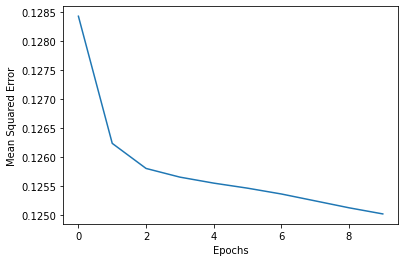

In [ ]:
plt.plot(np.array(list(loss_set3.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## Fourth Variation

In [ ]:
epochs4 = 20 # Number of epochs remain 10 for now
learning_rate4 = 0.005 # We change the learning rate from 0.001 to 0.005 and see what happens
loss_set4 = {}

In [ ]:
model_net4 = torch.nn.Sequential(torch.nn.Linear(3,5),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(5,10), # We add a third layer inbetween the initital two. This layer will contain 2 neurons, and give 3 outputs for the final layer.
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(10,1),
                                 torch.nn.Sigmoid());
loss_mse4 = torch.nn.MSELoss()
optimizer4 = torch.optim.RMSprop(model_net4.parameters(),lr=learning_rate4)

for i in tqdm_notebook(range(epochs4), total=epochs4, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse4(output, y_t.float())
          optimizer4.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer4.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set4[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set4[i]}")

<ipython-input-101-8c3f4636b95b>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs4), total=epochs4, unit="epoch"):


  0%|          | 0/20 [00:00<?, ?epoch/s]

Loss: 0.12873542308807373
Loss: 0.12704527378082275
Loss: 0.1267874836921692
Loss: 0.12662747502326965
Loss: 0.1265542060136795
Loss: 0.1263832449913025
Loss: 0.12601250410079956
Loss: 0.12603431940078735
Loss: 0.12604393064975739
Loss: 0.12597669661045074
Loss: 0.12593530118465424
Loss: 0.12587538361549377
Loss: 0.12594252824783325
Loss: 0.1257818639278412
Loss: 0.1258404701948166
Loss: 0.12588250637054443
Loss: 0.12583692371845245
Loss: 0.12588970363140106
Loss: 0.12583333253860474
Loss: 0.12584076821804047


There seems to be a pattern in the loss score, as it always ends up at 0.16088543832302094

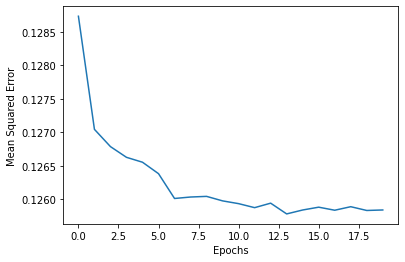

In [ ]:
plt.plot(np.array(list(loss_set4.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

##Fifth variation

In [ ]:
epochs5 = 200 # Number of epochs 200 
learning_rate5 = 0.001 # We change the learning rate to 0.001
loss_set5 = {}

In [ ]:
model_net5 = torch.nn.Sequential(torch.nn.Linear(3,8),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(8,4),  # We add a third layer. This layer will contain 8 neurons, and give 4 outputs for the next layer.
                                 torch.nn.Sigmoid(),
                                 torch.nn.Linear(4,2),  # We add a fourth layer. This layer will contain 4 neurons, and give 2 outputs for the final layer.
                                 torch.nn.Sigmoid(),
                                 torch.nn.Linear(2,1),
                                 torch.nn.Sigmoid());
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net5.parameters(),lr=learning_rate5)

for i in tqdm_notebook(range(epochs5), total=epochs5, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set5[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set5[i]}")

<ipython-input-104-2922052d6a53>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs5), total=epochs5, unit="epoch"):


  0%|          | 0/200 [00:00<?, ?epoch/s]

Loss: 0.13860461115837097
Loss: 0.13405196368694305
Loss: 0.1327267289161682
Loss: 0.13125677406787872
Loss: 0.12977561354637146
Loss: 0.1280984729528427
Loss: 0.12621431052684784
Loss: 0.12491752952337265
Loss: 0.12429390102624893
Loss: 0.12405232340097427
Loss: 0.12396653741598129
Loss: 0.12393850088119507
Loss: 0.12392770498991013
Loss: 0.12391979247331619
Loss: 0.12391206622123718
Loss: 0.12390003353357315
Loss: 0.1238936260342598
Loss: 0.12388477474451065
Loss: 0.12387549132108688
Loss: 0.12386579066514969
Loss: 0.12385327368974686
Loss: 0.12384028732776642
Loss: 0.12382682412862778
Loss: 0.1238134503364563
Loss: 0.12379813939332962
Loss: 0.12378176301717758
Loss: 0.1237645074725151
Loss: 0.12374531477689743
Loss: 0.12372586876153946
Loss: 0.12370296567678452
Loss: 0.12367883324623108
Loss: 0.1236511841416359
Loss: 0.12362396717071533
Loss: 0.12359274923801422
Loss: 0.12356213480234146
Loss: 0.12352751195430756
Loss: 0.12349476665258408
Loss: 0.12346141785383224
Loss: 0.1234291866

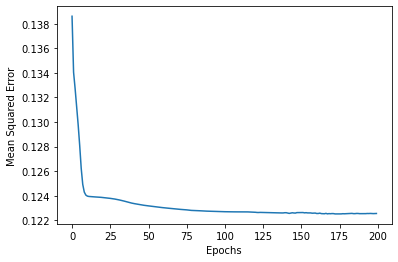

In [ ]:
plt.plot(np.array(list(loss_set5.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## Sixth Variation

In [ ]:
epochs6 = 10 # Number of epochs remain 10 for now
learning_rate6 = 0.003 # We change the learning rate to 0.003
loss_set6 = {}

In [ ]:
model_net6 = torch.nn.Sequential(torch.nn.Linear(3,2),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(2,3), # We add a third layer inbetween the initital two. This layer will contain 2 neurons, and give 3 outputs for the final layer.
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Tanh());
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model_net6.parameters(),lr=learning_rate6)

for i in tqdm_notebook(range(epochs6), total=epochs6, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net6.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set6[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set6[i]}")

<ipython-input-107-3132ee68ddb4>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs6), total=epochs6, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.14027321338653564
Loss: 0.13561266660690308
Loss: 0.13561278581619263
Loss: 0.13561278581619263
Loss: 0.13561278581619263
Loss: 0.13561278581619263
Loss: 0.13561278581619263
Loss: 0.13561278581619263
Loss: 0.13561278581619263
Loss: 0.13561278581619263


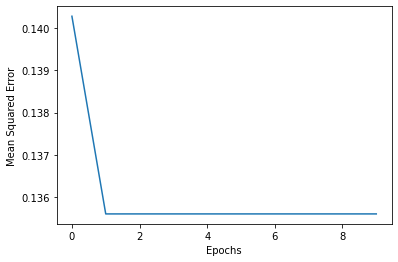

In [ ]:
plt.plot(np.array(list(loss_set6.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()